In [2]:
import numpy as np
import pandas as pd


import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats

import pickle  # To load data int disk
#from prettytable import PrettyTable  # To print in tabular format

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

%matplotlib inline

# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import shuffle
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    
# ETC 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import shuffle
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

### Data reading
Four csv files were merged to form a single dataframe. Attribute names were extracted from features.csv file and appended to the dataframe.

In [4]:
# Reading datasets

dataframe1 = pd.read_csv("UNSW-NB15_1.csv",low_memory=False, header=None)
dataframe2 = pd.read_csv("UNSW-NB15_2.csv", low_memory=False, header=None)
dataframe3 = pd.read_csv("UNSW-NB15_3.csv", low_memory=False, header=None)
dataframe4 = pd.read_csv("UNSW-NB15_4.csv",low_memory=False, header=None)

In [5]:
data = pd.concat([dataframe1, dataframe2, dataframe3, dataframe4])
data.shape

(2540047, 49)

## Taking 10% sample data

In [6]:
df = data.sample(frac =.10)
  
# checking if sample is 0.10 times data or not
  
if (0.10*(len(data))== len(df)):
    print( "Cool")
    print(len(data), len(df))
  
# display
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
261681,149.171.126.18,1043,175.45.176.1,53,udp,INT,0.000007,264,0,60,...,,28,28,14,14,14,14,28,NaN,0
154123,59.166.0.4,12685,149.171.126.1,5190,tcp,FIN,0.005678,2048,2410,31,...,,1,2,2,3,1,1,1,NaN,0
391105,59.166.0.2,59070,149.171.126.0,8885,tcp,FIN,0.069224,320,1934,31,...,,3,6,8,3,1,1,4,NaN,0
566768,59.166.0.6,25885,149.171.126.5,80,tcp,FIN,1.012795,1684,10168,31,...,0,1,2,1,1,1,1,1,NaN,0
459153,59.166.0.8,5421,149.171.126.8,53,udp,CON,0.000993,130,162,31,...,,3,4,2,6,3,1,2,NaN,0


In [7]:
df.shape

(254005, 49)

In [8]:
# Reading features.csv file and converting it to dataframe
df_feature = pd.read_csv('NUSW-NB15_features.csv' , encoding = "ISO-8859-1")
df_feature['Name']

0                srcip
1                sport
2                dstip
3               dsport
4                proto
5                state
6                  dur
7               sbytes
8               dbytes
9                 sttl
10                dttl
11               sloss
12               dloss
13             service
14               Sload
15               Dload
16               Spkts
17               Dpkts
18                swin
19                dwin
20               stcpb
21               dtcpb
22             smeansz
23             dmeansz
24         trans_depth
25         res_bdy_len
26                Sjit
27                Djit
28               Stime
29               Ltime
30             Sintpkt
31             Dintpkt
32              tcprtt
33              synack
34              ackdat
35     is_sm_ips_ports
36        ct_state_ttl
37    ct_flw_http_mthd
38        is_ftp_login
39          ct_ftp_cmd
40          ct_srv_src
41          ct_srv_dst
42          ct_dst_ltm
43         

In [9]:
# Making column names lower case, removing spaces
df_feature['Name'] = df_feature['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

In [10]:
# Renaming our dataframe with proper column names (srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,stcpb,dtcpb,smeansz,dmeansz,res_bdy_len,sjit,djit,sintpkt,dintpkt,tcprtt,synack,ackdat,ct_state_ttl,ct_flw_http_mthd,ct_srv_src,ct_srv_dst,ct_dst_src_ltm,attack_cat,label)
df.columns = df_feature['Name']

In [11]:
df.shape

(254005, 49)

In [12]:
df.head(5)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
261681,149.171.126.18,1043,175.45.176.1,53,udp,INT,0.000007,264,0,60,...,,28,28,14,14,14,14,28,NaN,0
154123,59.166.0.4,12685,149.171.126.1,5190,tcp,FIN,0.005678,2048,2410,31,...,,1,2,2,3,1,1,1,NaN,0
391105,59.166.0.2,59070,149.171.126.0,8885,tcp,FIN,0.069224,320,1934,31,...,,3,6,8,3,1,1,4,NaN,0
566768,59.166.0.6,25885,149.171.126.5,80,tcp,FIN,1.012795,1684,10168,31,...,0,1,2,1,1,1,1,1,NaN,0
459153,59.166.0.8,5421,149.171.126.8,53,udp,CON,0.000993,130,162,31,...,,3,4,2,6,3,1,2,NaN,0


In [13]:
# Delete data frames 1,2,3, and 4

del dataframe1
del dataframe2
del dataframe3
del dataframe4

## Data Exploration

**Checking for Correlation between all features**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# Take a sample of the dataframe for exploration purpose


# generating one row 
sample = df.sample(frac =.25)
  
# checking if sample is 0.25 times data or not
  
if (0.25*(len(df))== len(sample)):
    print( "Cool")
    print(len(df), len(sample))
  
# display
sample

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
316565,59.166.0.6,51535,149.171.126.7,14761,tcp,FIN,0.011988,2334,16734,31,...,0,8,4,3,2,1,1,1,NaN,0
99487,59.166.0.4,62160,149.171.126.8,28778,tcp,FIN,0.008997,2230,13968,31,...,0,9,6,4,4,1,1,2,NaN,0
238734,59.166.0.7,54678,149.171.126.5,53,udp,CON,0.001040,146,178,31,...,0,1,1,2,2,1,1,1,NaN,0
127467,59.166.0.1,14501,149.171.126.2,53,udp,CON,0.001120,130,162,31,...,0,2,3,2,4,1,1,1,NaN,0
426921,59.166.0.6,64181,149.171.126.3,15848,tcp,FIN,0.024796,2334,17532,31,...,,10,1,2,7,1,1,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72029,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000009,264,0,60,...,,45,45,24,24,24,24,45,NaN,0
419690,59.166.0.1,3363,149.171.126.9,53634,tcp,FIN,0.029794,3926,57202,31,...,,6,1,2,9,1,1,1,NaN,0
683682,149.171.126.18,47439,175.45.176.3,53,udp,INT,0.000002,264,0,60,...,,39,39,25,25,25,25,39,NaN,0
503297,59.166.0.8,5467,149.171.126.7,49503,tcp,FIN,0.152840,5174,88436,31,...,0,10,5,3,6,1,1,1,NaN,0


In [16]:
sample.corr()

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
Name,,,,,,,,,,,,,,,,,,,,,
dur,1.000000,0.141089,0.355515,-0.016051,0.047072,0.169249,0.358729,-0.057154,-0.085328,0.341890,...,0.089635,0.042618,-0.075602,-0.070987,-0.050819,-0.060266,-0.049951,-0.044984,-0.061843,0.005916
sbytes,0.141089,1.000000,0.036842,-0.001298,0.066212,0.969389,0.039375,-0.017636,-0.006819,0.681415,...,-0.009031,-0.009062,-0.030341,-0.030017,-0.023467,-0.022216,-0.023384,-0.023534,-0.026099,0.013789
dbytes,0.355515,0.036842,1.000000,-0.094132,0.009816,0.093892,0.990908,-0.070319,0.084992,0.662457,...,0.077315,-0.049270,-0.049607,-0.049253,-0.058087,-0.063954,-0.064044,-0.070497,-0.078399,-0.075684
sttl,-0.016051,-0.001298,-0.094132,1.000000,0.107057,-0.051652,-0.119564,0.283041,-0.248807,-0.136861,...,0.045800,-0.007768,0.457076,0.459472,0.394733,0.394586,0.456379,0.483660,0.514695,0.905537
dttl,0.047072,0.066212,0.009816,0.107057,1.000000,0.074835,0.014485,-0.220615,-0.022314,0.051489,...,0.170026,0.084276,-0.302109,-0.308999,-0.285715,-0.278726,-0.274112,-0.287782,-0.288112,0.133194
sloss,0.169249,0.969389,0.093892,-0.051652,0.074835,1.000000,0.125071,-0.057629,0.037008,0.775470,...,-0.047722,0.045484,-0.069412,-0.070073,-0.065698,-0.064488,-0.070938,-0.072819,-0.078505,-0.030523
dloss,0.358729,0.039375,0.990908,-0.119564,0.014485,0.125071,1.000000,-0.089877,0.110511,0.700323,...,0.062812,-0.020478,-0.071794,-0.072335,-0.080130,-0.085393,-0.088993,-0.095606,-0.105417,-0.096985
sload,-0.057154,-0.017636,-0.070319,0.283041,-0.220615,-0.057629,-0.089877,1.000000,-0.176272,-0.116924,...,-0.029760,-0.021136,0.474792,0.480267,0.428554,0.418799,0.472460,0.488609,0.514432,0.197436
dload,-0.085328,-0.006819,0.084992,-0.248807,-0.022314,0.037008,0.110511,-0.176272,1.000000,0.154818,...,-0.161902,-0.125262,-0.146934,-0.171939,-0.215749,-0.192935,-0.233766,-0.236180,-0.255204,-0.222340


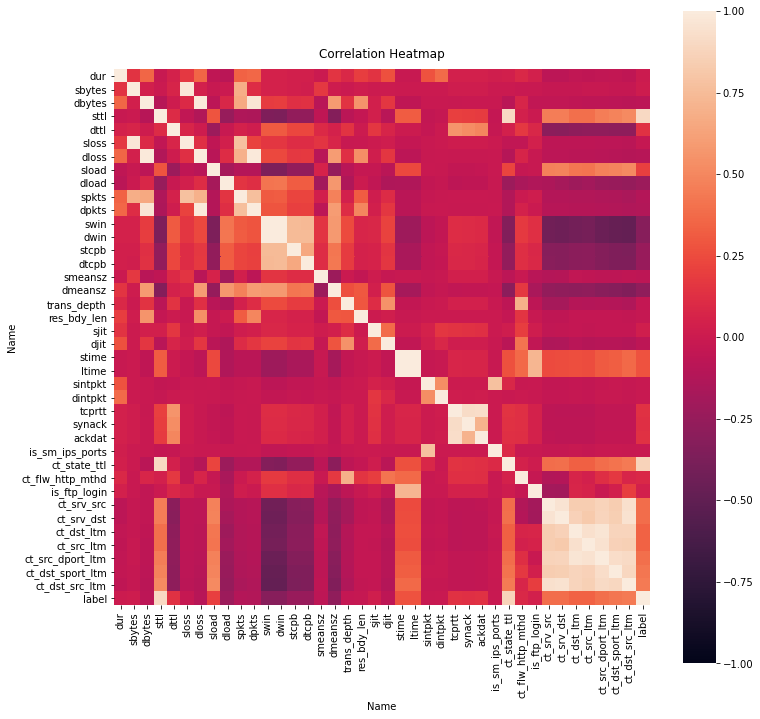

In [17]:
plt.figure(figsize=(12, 12))
method = "pearson"
correlation = sample.corr(method=method)
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=False,square=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', pad=12);


In [18]:
# Getting and printing high correlated features
limit = 0.9

columns = correlation.columns
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {correlation.iloc[i, j]}")


sbytes               sloss                0.9693887475644111
dbytes               dloss                0.9909076607296556
dbytes               dpkts                0.9685293501593547
sttl                 ct_state_ttl         0.9059496046840156
sttl                 label                0.9055372595632215
dloss                dpkts                0.991047558105932
swin                 dwin                 0.9974662036572519
stime                ltime                0.9999999995228134
tcprtt               synack               0.9208861137895509
tcprtt               ackdat               0.9253148491775923
ct_srv_src           ct_srv_dst           0.9576798790462607
ct_srv_src           ct_dst_src_ltm       0.9434432362726348
ct_srv_dst           ct_dst_src_ltm       0.9518301106983472
ct_dst_ltm           ct_src_ltm           0.9410953324840448
ct_dst_ltm           ct_src_dport_ltm     0.9622446986136765
ct_src_ltm           ct_src_dport_ltm     0.9475451619823118
ct_src_dport_ltm     ct_d


Most correlated features are:

- sbytes, sloss
- dpkts, dbytes, dloss
- sttl, ct_state_ttl, label
- swin, dwin
- stime, dtime
- tcprtt, synack, ackdat
- ct_srv_src, ct_dst_src_ltm, ct_srv_dst
- ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm

### Data cleaning and Preprocessing

In [19]:
df.shape


(254005, 49)

**Checking For Data types of the attributes, feature type(categorical, numerical,binary)**

In [20]:
# All the datatypes in our dataset
df.dtypes.value_counts()

int64      28
float64    12
object      9
dtype: int64

In [21]:
# Categorical feature names

df.select_dtypes(exclude=np.number).columns


Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name')

In [22]:
# In research paper it is given that the column 'ct_ftp_cmd' is a numerical feature not a categorical

df['ct_ftp_cmd'].unique()

array([' ', 0, '0', '1', 5, 1, 2, 6, 4, 3, '4', '2', 8], dtype=object)

In [23]:
# We can see space in the attribute ct_ftp_cmd replacing it by zero and converting to numerical datatype

df['ct_ftp_cmd'] = df['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)


In [24]:
# Checking for the new change

df['ct_ftp_cmd'].unique()

array([0, 1, 5, 2, 6, 4, 3, 8])

In [25]:
# Checking for categorical names

df.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'attack_cat'],
      dtype='object', name='Name')

In [26]:
# Numerical feature names

df.select_dtypes(include=np.number).columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object', name='Name')

**The target features of this dataset are 'attack_cat' and 'label'.**

In [27]:
# Checking for binary features

for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(df[col].value_counts())
    print()

0    253570
1       435
Name: is_sm_ips_ports, dtype: int64

0.0    106171
1.0      4326
4.0        14
2.0         5
Name: is_ftp_login, dtype: int64



is_ftp_login feature is having non binary values we need to fix them by replacing them to 1, 0

In [28]:
df['is_ftp_login'] = np.where(df['is_ftp_login']>1, 1, df['is_ftp_login'])

In [29]:
df['is_ftp_login'].value_counts()

0.0    106171
1.0      4345
Name: is_ftp_login, dtype: int64

**Removing '-' values in the feature service**

In [30]:
# service feature is having - values replace them by adding Null
df['service'].value_counts()

-           124713
dns          78288
http         20672
ftp-data     12444
smtp          8103
ftp           4904
ssh           4679
pop3           152
ssl             22
dhcp            12
snmp            12
irc              3
radius           1
Name: service, dtype: int64

In [31]:
df['service'] = df['service'].apply(lambda x:"None" if x=="-" else x)

**Handling null values**

In [32]:
# Checking for null values

df.isnull().sum()

Name
srcip                    0
sport                    0
dstip                    0
dsport                   0
proto                    0
state                    0
dur                      0
sbytes                   0
dbytes                   0
sttl                     0
dttl                     0
sloss                    0
dloss                    0
service                  0
sload                    0
dload                    0
spkts                    0
dpkts                    0
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smeansz                  0
dmeansz                  0
trans_depth              0
res_bdy_len              0
sjit                     0
djit                     0
stime                    0
ltime                    0
sintpkt                  0
dintpkt                  0
tcprtt                   0
synack                   0
ackdat                   0
is_sm_ips_ports          0
ct_state_ttl           

Seems like colummns ct_flw_http_mthd, is_ftp_login, and attack_cat are having null values.
 

In [33]:
df['attack_cat'].value_counts()

Generic             21716
Exploits             4530
 Fuzzers             1924
DoS                  1697
 Reconnaissance      1248
 Fuzzers              504
Analysis              267
Reconnaissance        200
Backdoor              179
 Shellcode            138
Backdoors              50
Worms                  30
Shellcode              27
Name: attack_cat, dtype: int64

attack_cat records were classified as null when the attack label was zero. These were duly converted as ‘Normal’ type of attack.

In [34]:
df['attack_cat'] = df.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())

In [35]:
df['ct_flw_http_mthd'].value_counts()

0.0     98143
1.0     18782
6.0       791
4.0       658
3.0        71
2.0        53
5.0        47
9.0        27
12.0       14
14.0       13
30.0        9
8.0         7
16.0        4
36.0        4
10.0        2
25.0        1
Name: ct_flw_http_mthd, dtype: int64

In [36]:
# Filling zero for ct_flw_http_mthd and is_ftp_login

df['ct_flw_http_mthd'] = df.ct_flw_http_mthd.fillna(value=0)

In [37]:
#is_ftp_login column is  a binary column, but there're values like 2 and 4 so changining it to a int type

df['is_ftp_login'].value_counts()

df['is_ftp_login'] = df.is_ftp_login.fillna(value=0).astype('int')

**Checking for unique values**

In [38]:
#Checking for attack_cat unique values 

df['attack_cat'].unique()

array(['normal', 'reconnaissance', 'generic', 'dos', 'exploits',
       'shellcode', 'fuzzers', 'analysis', 'backdoor', 'backdoors',
       'worms'], dtype=object)

Research paper says there are not 11 unique values for attack_cat so need to fix it. # Redundancy in the attack categories like ‘Backdoors’ and ‘Backdoor’ although both belong to the same class.Uniformity was brought in such scenarios.

In [41]:
# Fixing it by using strip, replacing backdoors to backdoor

df['attack_cat'] = df['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())


In [42]:
df['attack_cat'].unique()

array(['normal', 'generic', 'exploits', 'analysis', 'dos', 'fuzzers',
       'backdoor', 'reconnaissance', 'shellcode', 'worms'], dtype=object)

### Data Exploration after cleaning

**Counter Plot for number of attacks**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'reconnaissance'),
  Text(2, 0, 'generic'),
  Text(3, 0, 'dos'),
  Text(4, 0, 'exploits'),
  Text(5, 0, 'shellcode'),
  Text(6, 0, 'fuzzers'),
  Text(7, 0, 'analysis'),
  Text(8, 0, 'backdoor'),
  Text(9, 0, 'backdoors'),
  Text(10, 0, 'worms')])

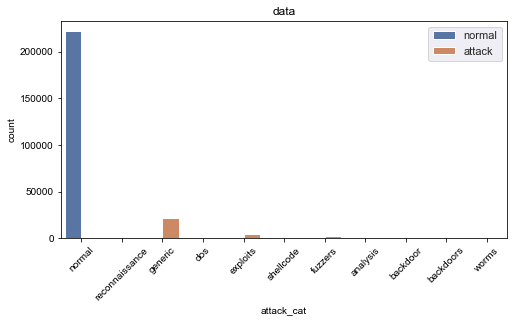

In [39]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,4))
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x='attack_cat', data=df,hue='label')

ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("data")
plt.xticks(rotation=45)

**Attack Category
,the name of each attack category.** 
In this data set, there are total nine categories of attack and normal is non-attack.

The data is highly imbalanced and have lots of non-attack than attacks.

In train data most occured attack data categories are "Generic", "Exploits", Fuzzers", "DoS" and "Reconnaissance"

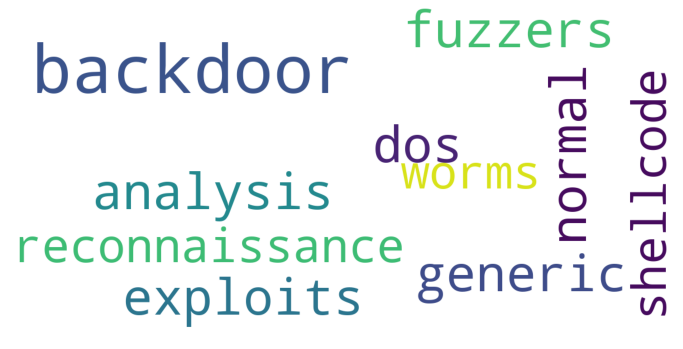

In [40]:
# Function to show the different attack categories present in the dataset

stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):

    attack_catgs = data.loc[:,'attack_cat'].replace('Backdoor','Backdoors', regex=False)
    attack_catgs = attack_catgs.dropna().to_numpy()
    attack_catgs = [x.strip(' ') for x in attack_catgs]
    attack_catgs = np.unique(attack_catgs)
    text = " ".join(str(item) for item in attack_catgs)
    wordcloud = WordCloud(
        background_color='white',
        collocations=False,
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(text)
 
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df)


### Feature Engineering

**Remove highely correlated features**

In [41]:
# Utility function
def multi_corr(col1, col2="label", df=df):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [42]:
def corr(col1, col2="label", df=df):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]


In [43]:
# Selecting all the features with high correlation values with other features
# Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [44]:
# We don't want to use these features for plotting because these are having high corr
# And most likely have same kind of plots with already plotted feature
print(to_drop)

['sloss', 'dloss', 'dpkts', 'dwin', 'ltime', 'ct_srv_dst', 'ct_src_dport_ltm', 'ct_dst_src_ltm']


In [45]:
df.drop(columns=to_drop, inplace=True)

In [46]:
df.shape


(254005, 41)

In [47]:
column_attributes = list (df_feature['Name'])
df.shape

(254005, 41)

In [48]:
# Dropping columns which are not useful for the classification
# all the other columns are address related and not present in sample train data
df.drop(['srcip', 'sport', 'dstip', 'dsport'], axis=1, inplace=True)

In [49]:
print(df.shape)
df.columns
column_attributes_non_correlated = list (df.columns)
column_attributes_non_correlated

(254005, 37)


['proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'service',
 'sload',
 'dload',
 'spkts',
 'swin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'sjit',
 'djit',
 'stime',
 'sintpkt',
 'dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_dst_sport_ltm',
 'attack_cat',
 'label']

### Applying log1p on Numerical columns¶
During EDA we found that few numerical columns shows better visualization for pdf curves if we apply log1p to the columns.

So I thought to try log1p on all the columns and check the correlation value of the original column and log1p column with target column i.e. "label"

In [50]:
# Getting number of unique values of all the columns
# If the unique values are high that means it has continuous set of values
col_unique_values = df.nunique()

In [51]:
# If the unique values are getter than some threshould than we will check its corr
col = col_unique_values[col_unique_values>200].index


In [52]:
# Checking corr value of original col and log1p applied col
# Taking those columns whose unique values are getter than some threshould
for column in col:
    print("{:-^30}".format(column))
    multi_corr(column)


-------------dur--------------
Correlation : 0.0015566056559237742
log_Correlation: -0.029243182232903883
------------sbytes------------
Correlation : 0.01150633824000225
log_Correlation: -0.3557189956310283
------------dbytes------------
Correlation : -0.07740448239015536
log_Correlation: -0.518454460970799
------------sload-------------
Correlation : 0.19191991261925812
log_Correlation: 0.3436003691946966
------------dload-------------
Correlation : -0.22068670484859063
log_Correlation: -0.6025508659412867
------------spkts-------------
Correlation : -0.12072568681645099
log_Correlation: -0.31634754601547865
------------stcpb-------------
Correlation : -0.23460772676900715
log_Correlation: -0.3126493776890363
------------dtcpb-------------
Correlation : -0.2334798347492391
log_Correlation: -0.31232383888214016
-----------smeansz------------
Correlation : -0.06366078615612845
log_Correlation: -0.15047931815807034
-----------dmeansz------------
Correlation : -0.27278308610093
log_Corre

In [53]:
# Will apply log1p on these columns and remove original columns
log1p_col = ['dur', 'sbytes', 'dbytes', 'sload', 'dload', 'spkts', 
             'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'sjit', 'djit']

In [54]:
# mode values of every features, will use to fill Null values of test
mode_dict = df.mode().iloc[0].to_dict()

In [55]:
def log1p_transform(col, df=df):
    '''
    Apply log1p on given column.
    Remove the original cola and keep log1p applied col
    '''
    new_col = col+'_log1p'
    df[new_col] = df[col].apply(np.log1p)
    df.drop(col, axis=1, inplace=True)

In [56]:

# Transforming columns with log1p
for col in log1p_col:
    log1p_transform(col, df=df)

In [57]:
df.shape

(254005, 37)

In [58]:
df.columns

Index(['proto', 'state', 'sttl', 'dttl', 'service', 'swin', 'trans_depth',
       'res_bdy_len', 'stime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_dst_sport_ltm', 'attack_cat', 'label', 'dur_log1p', 'sbytes_log1p',
       'dbytes_log1p', 'sload_log1p', 'dload_log1p', 'spkts_log1p',
       'stcpb_log1p', 'dtcpb_log1p', 'smeansz_log1p', 'dmeansz_log1p',
       'sjit_log1p', 'djit_log1p'],
      dtype='object', name='Name')

In [59]:
df.shape

(254005, 37)

In [60]:
## Store input columns in X
X  = df.drop(["label", "attack_cat"], axis=1)
X.columns 


Index(['proto', 'state', 'sttl', 'dttl', 'service', 'swin', 'trans_depth',
       'res_bdy_len', 'stime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_dst_sport_ltm', 'dur_log1p', 'sbytes_log1p', 'dbytes_log1p',
       'sload_log1p', 'dload_log1p', 'spkts_log1p', 'stcpb_log1p',
       'dtcpb_log1p', 'smeansz_log1p', 'dmeansz_log1p', 'sjit_log1p',
       'djit_log1p'],
      dtype='object', name='Name')

In [61]:

# Store output columns in Y

Y = df[['attack_cat','label']]



In [62]:
# Checking for categorical names

df.select_dtypes(exclude=np.number).columns
df.shape

(254005, 37)

#### One hot encoding to the categorical features

In [63]:
#Convert categorical features into numerical by using one hot encoding

X.loc[:,'proto'] = X.loc[:,'proto'].astype('category').cat.codes


X.loc[:,'state'] = X.loc[:,'state'].astype('category').cat.codes


X.loc[:,'service'] = X.loc[:,'service'].astype('category').cat.codes



In [64]:
# Check converted category feature datatype
X['proto'].dtypes


dtype('int16')

#### One Hot Encoding of output column 'attack_cat'


In [65]:

c = Y.attack_cat.astype('category')

d = dict(enumerate(c.cat.categories))
print (d)
Y.loc[:,'attack_cat'] = Y.loc[:,'attack_cat'].astype('category').cat.codes




Y.loc[:,'attack_cat']

{0: 'analysis', 1: 'backdoor', 2: 'backdoors', 3: 'dos', 4: 'exploits', 5: 'fuzzers', 6: 'generic', 7: 'normal', 8: 'reconnaissance', 9: 'shellcode', 10: 'worms'}


261681    7
154123    7
391105    7
566768    7
459153    7
         ..
175896    7
356889    7
370567    7
408916    7
637806    7
Name: attack_cat, Length: 254005, dtype: int8

In [66]:
Y.dtypes




Name
attack_cat     int8
label         int64
dtype: object

In [67]:

Y['attack_cat']
y_cat=[]
y_cat = np.array(Y['attack_cat']).reshape(-1,1)
y_cat


array([[7],
       [7],
       [7],
       ...,
       [7],
       [7],
       [7]], dtype=int8)

### Data Normalization

In [68]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
# Pass parameter type = 'statistical' or 'minmax'
# Note: statistical is better for SVM and KNN.
def normalization(data, type='minmax'):
    if type == 'statistical':
        return stats.zscore(data)
    elif type == 'minmax':
        scaler = MinMaxScaler()
        return scaler.fit_transform(data)
    else:
        print('\n Norm type not found! \n')

In [69]:
X = normalization(X, 'minmax')

In [70]:
X.shape

(254005, 35)

## Feature Selection by Extra Tree Classifier

In [71]:
clf = ExtraTreesClassifier(n_estimators=500)
clf = clf.fit(X, y_cat)

In [72]:
features=[]
print(clf.feature_importances_)
features=(clf.feature_importances_).tolist()

[1.06996879e-02 1.07023402e-02 2.69961389e-01 4.48580603e-02
 2.72054908e-02 1.44663829e-02 2.92815882e-03 1.10757112e-03
 2.11339853e-02 5.59537140e-03 3.65021638e-03 7.83468975e-03
 6.23992854e-03 6.30155050e-03 8.25058067e-04 1.29690526e-01
 1.23906464e-03 5.42845184e-04 2.16191347e-04 3.20526586e-02
 1.93207915e-02 1.62678314e-02 2.64017965e-02 9.12014287e-03
 5.44247628e-02 3.63579709e-02 2.55883075e-02 5.16299359e-02
 7.49749561e-03 1.18552478e-02 1.11967154e-02 6.02794849e-02
 5.70953074e-02 8.85661988e-03 6.85642251e-03]


In [73]:
print("Features sorted by their score:")
feature_imp = sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), column_attributes), 
             reverse=True)
print(feature_imp)
low_variance_cols = [x[0] for x in feature_imp if x[0] < 0.002]
print()
print("low variance cols :",low_variance_cols)

Features sorted by their score:
[(0.27, 'dstip'), (0.1297, 'dload'), (0.0603, 'dintpkt'), (0.0571, 'tcprtt'), (0.0544, 'trans_depth'), (0.0516, 'djit'), (0.0449, 'dsport'), (0.0364, 'res_bdy_len'), (0.0321, 'dwin'), (0.0272, 'proto'), (0.0264, 'smeansz'), (0.0256, 'sjit'), (0.0211, 'dbytes'), (0.0193, 'stcpb'), (0.0163, 'dtcpb'), (0.0145, 'state'), (0.0119, 'ltime'), (0.0112, 'sintpkt'), (0.0107, 'srcip'), (0.0107, 'sport'), (0.0091, 'dmeansz'), (0.0089, 'synack'), (0.0078, 'sloss'), (0.0075, 'stime'), (0.0069, 'ackdat'), (0.0063, 'service'), (0.0062, 'dloss'), (0.0056, 'sttl'), (0.0037, 'dttl'), (0.0029, 'dur'), (0.0012, 'spkts'), (0.0011, 'sbytes'), (0.0008, 'sload'), (0.0005, 'dpkts'), (0.0002, 'swin')]

low variance cols : [0.0012, 0.0011, 0.0008, 0.0005, 0.0002]


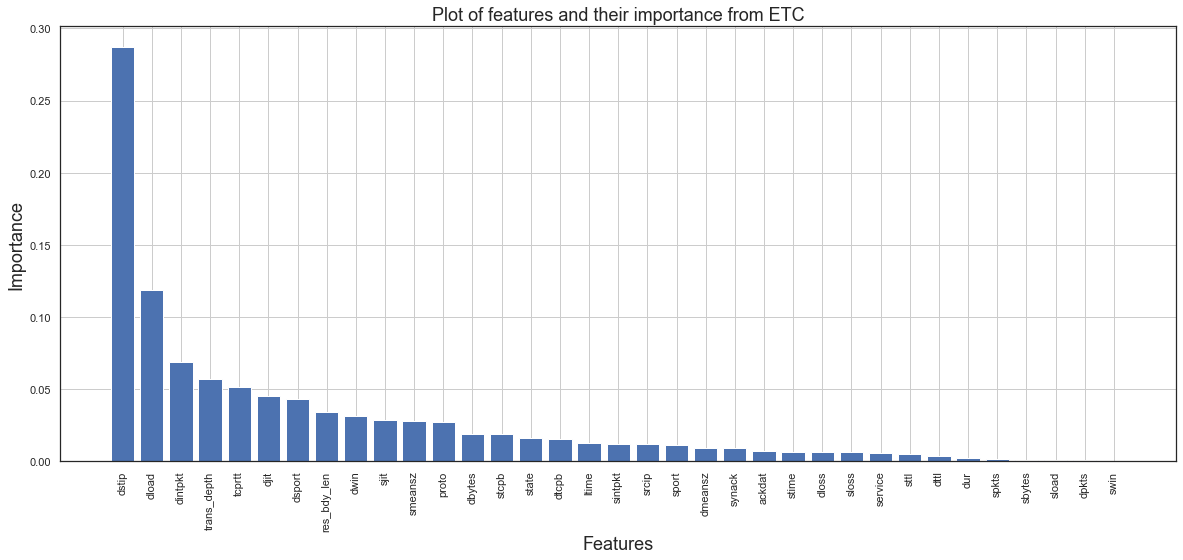

In [94]:
features_sorted_by_their_score =[(0.2871, 'dstip'), (0.1184, 'dload'), (0.0686, 'dintpkt'), (0.0572, 'trans_depth'), (0.0511, 'tcprtt'), 
                                 (0.0451, 'djit'), (0.043, 'dsport'), (0.0338, 'res_bdy_len'), (0.0313, 'dwin'), (0.0286, 'sjit'), 
                                 (0.028, 'smeansz'), (0.027, 'proto'), (0.0191, 'dbytes'), (0.019, 'stcpb'), (0.0158, 'state'), 
                                 (0.0152, 'dtcpb'), (0.0124, 'ltime'), (0.012, 'sintpkt'), (0.0116, 'srcip'), (0.011, 'sport'), 
                                 (0.0093, 'dmeansz'), (0.0088, 'synack'), (0.0068, 'ackdat'), (0.0066, 'stime'), (0.0062, 'dloss'), 
                                 (0.0061, 'sloss'), (0.0055, 'service'), (0.0053, 'sttl'), (0.0036, 'dttl'), (0.0023, 'dur'), 
                                 (0.0014, 'spkts'), (0.0011, 'sbytes'), (0.0007, 'sload'), (0.0005, 'dpkts'), (0.0003, 'swin')]

x = [v for v, k in features_sorted_by_their_score]
y = [k for v, k in features_sorted_by_their_score]

plt.figure(figsize=(20,8))
plt.bar(y, x)
plt.xticks(rotation=90)
plt.xlabel("Features",fontsize=18)
plt.ylabel("Importance",fontsize=18)
plt.title("Plot of features and their importance from ETC",fontsize=18)
plt.grid()
plt.show()


In [74]:
#selecting features
sfm = SelectFromModel(clf, threshold = 0.002)
sfm.fit(X,y_cat)
support_idx = list(sfm.get_support())
print(support_idx)
print(len(support_idx))

[True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
35


In [75]:
X= sfm.transform(X)
print(df.shape)
print(X.shape)

(254005, 37)
(254005, 30)


In [76]:
y_cat.shape

(254005, 1)

In [77]:
X.shape


(254005, 30)

In [78]:
# Plot to show the distribution of all attack categories

def plot_attack_category(data):
    attack_catgs = data.loc[:,'attack_cat'].replace('Backdoor','Backdoors', regex=False)
    attack_catgs = attack_catgs.dropna().to_numpy()
    attack_catgs = [x.strip(' ') for x in attack_catgs]
    sns.set(rc={'figure.figsize':(15,10),"font.size":70,"axes.titlesize":40,"axes.labelsize":20},style="white")
    catg_plot = sns.countplot(attack_catgs,data = data)
    for p in catg_plot.patches:
      height = p.get_height()
      catg_plot.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize = 15)


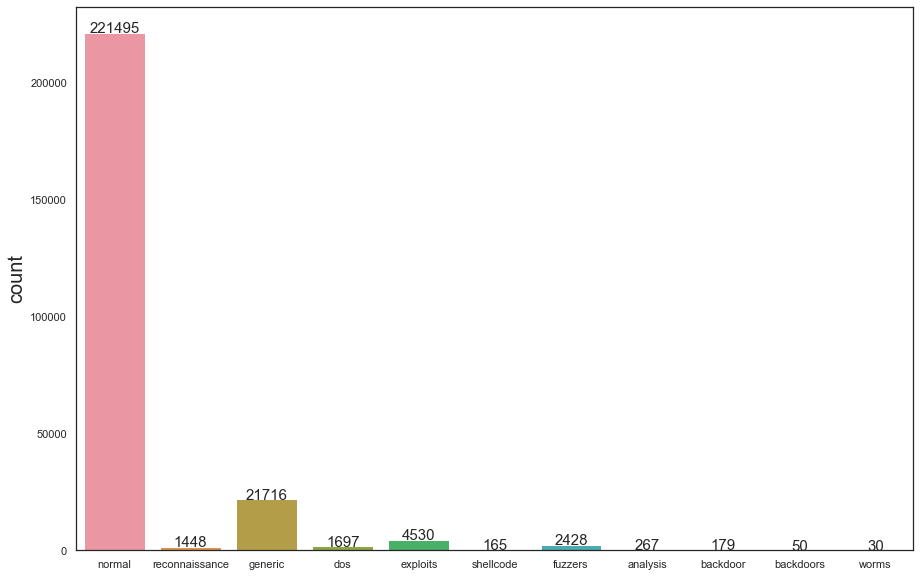

In [79]:
plot_attack_category(df)

In [80]:
Counter(Y['attack_cat'])


Counter({7: 221495,
         8: 1448,
         6: 21716,
         3: 1697,
         4: 4530,
         9: 165,
         5: 2428,
         0: 267,
         1: 179,
         2: 50,
         10: 30})

In [81]:
# Retrive all Normal and Generic row data and convert as list

filter_list = [(x,y) for (x,y) in zip(X,Y['attack_cat'])if (y ==0 or y== 4)]
x = []
y = []
for i , val in enumerate(filter_list):
  x.append(val[0])
  y.append(val[1])

In [82]:
# Undersample Normal and Generic class instances 

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 267, 4: 267})


In [83]:
# Retrive all other rows except Normal and Generic row data and convert as list

filter_other_cat = [(x,y) for (x,y) in zip(X,Y['attack_cat'])if (y !=0 and y!= 4)]
x_other = []
y_other = []
for i , val in enumerate(filter_other_cat):
  x_other.append(val[0])
  y_other.append(val[1])

In [84]:
dataset_1 = pd.DataFrame(X_res)

dataset_1['attack_cat'] = y_res

dataset_2 = pd.DataFrame(x_other)

dataset_2['attack_cat'] = y_other

dataset_merged = pd.concat([dataset_1, dataset_2])

dataset_merged.shape

(249742, 31)

In [85]:
dataset = shuffle(dataset_merged).reset_index(drop=True)

In [86]:
# add label col and initialize to 0 
dataset_merged['label'] = 0
dataset_merged.shape

(249742, 32)

In [87]:
dataset.loc[dataset['attack_cat']==6,'label'] = str(0)
dataset.loc[dataset['attack_cat']!=6,'label'] = str(1)
dataset[0:5]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,attack_cat,label
0,0.901515,0.428571,0.235294,0.000000,0.166667,0.0,0.0,0.996635,1.166590e-07,0.000000e+00,...,0.000000,0.120834,0.000000,0.000000,0.668639,0.000000,0.000000,0.000000,7,1
1,0.901515,0.428571,0.996078,0.000000,0.166667,0.0,0.0,0.983984,1.499901e-07,0.000000e+00,...,0.000000,0.120834,0.000000,0.000000,0.555169,0.000000,0.000000,0.000000,6,0
2,0.901515,0.142857,0.121569,0.114173,0.166667,0.0,0.0,0.983435,1.333245e-07,3.731388e-08,...,0.716506,0.120834,0.000000,0.000000,0.572836,0.603957,0.000000,0.000000,7,1
3,0.901515,0.428571,0.235294,0.000000,0.166667,0.0,0.0,0.995692,1.166590e-07,0.000000e+00,...,0.000000,0.120834,0.000000,0.000000,0.668639,0.000000,0.000000,0.000000,7,1
4,0.856061,0.357143,0.121569,0.114173,0.000000,1.0,0.0,0.999320,5.009919e-04,3.049653e-04,...,0.714631,0.676493,0.979974,0.980998,0.552791,0.980244,0.671593,0.687138,7,1


In [88]:
col_names = column_attributes_non_correlated.copy()

print(col_names)
print()
print(len(col_names))
print()

for val, idx in zip(col_names, support_idx):
  if not idx :
      col_names.remove(val)
        
print(col_names)
print()
print(len(col_names))

name = [v.lower() for k, v in enumerate(col_names)]

dataset_merged.columns = name




['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'service', 'sload', 'dload', 'spkts', 'swin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'ct_dst_sport_ltm', 'attack_cat', 'label']

37

['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'spkts', 'swin', 'stcpb', 'dtcpb', 'smeansz', 'trans_depth', 'res_bdy_len', 'djit', 'sintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'ct_dst_sport_ltm', 'attack_cat', 'label']

32


In [89]:
len(name)

32

In [90]:
len(dataset_merged.columns)

32

In [91]:
dataset_merged

,proto,state,dur,sbytes,dbytes,sttl,dttl,sload,dload,spkts,...,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm,attack_cat,label
0,0.909091,0.428571,0.996078,0.000000,0.000000,0.0,0.0,0.986430,1.666556e-07,0.000000,...,0.000000,0.120834,0.000000,0.000000,0.631008,0.000000,0.000000,0.000000,0,0
1,0.053030,0.428571,0.996078,0.000000,0.000000,0.0,0.0,0.983361,1.499901e-07,0.000000,...,0.000000,0.120834,0.000000,0.000000,0.631008,0.000000,0.000000,0.000000,0,0
2,0.856061,0.357143,0.243137,0.992126,0.416667,1.0,0.5,0.999579,1.659735e-03,0.002132,...,0.483551,0.263740,0.834603,0.959805,0.604171,0.672286,0.616227,0.399587,0,0
3,0.393939,0.428571,0.996078,0.000000,0.000000,0.0,0.0,0.992422,1.499901e-07,0.000000,...,0.000000,0.120834,0.000000,0.000000,0.631008,0.000000,0.000000,0.000000,0,0
4,0.856061,0.357143,0.243137,0.992126,0.416667,1.0,0.5,0.990605,1.003071e-03,0.001230,...,0.515750,0.263740,0.874349,0.998790,0.602514,0.684886,0.572239,0.333670,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249203,0.856061,0.357143,0.121569,0.114173,0.250000,1.0,0.0,0.988619,5.137294e-04,0.000553,...,0.526717,0.436685,0.987100,0.938119,0.552791,0.582272,0.560029,0.329466,7,0
249204,0.856061,0.357143,0.121569,0.114173,0.000000,1.0,0.0,0.006367,9.819967e-06,0.000011,...,0.864208,0.452147,0.983620,0.983911,0.562064,0.904909,0.256071,0.269021,7,0
249205,0.856061,0.357143,0.121569,0.114173,0.000000,1.0,0.0,0.019083,3.978267e-05,0.000045,...,0.695906,0.323853,0.980221,0.913312,0.727795,0.674301,0.350554,0.123080,7,0
249206,0.856061,0.357143,0.121569,0.114173,0.750000,1.0,0.0,0.007388,1.625105e-04,0.000226,...,0.582589,0.436685,0.990340,0.990354,0.898985,0.602275,0.474993,0.246376,7,0


In [92]:
# final dataset for ETC
dataset.to_csv('dataset_ETC.csv')
